In this notebook we will be loading the images in the training test and validation datasets, then wrangling the image datasets

We will be first loading the libraries that we will need

In [49]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

After importing the necessary libraries, I need to look at loading all the files. I need to look at the training, test and validation datasets.
Let us look at the training dataset first

In [40]:
training_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/train/NORMAL/'
training_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/train/PNEUMONIA/'

We will take the file names from the folder for training pneumonia and normal in a list and have the labels next to them. 

In [41]:
image_paths_normal = glob.glob(training_folder_normal + '*.jpeg')
image_paths_pneumonia = glob.glob(training_folder_pneumonia + '*.jpeg')



In [22]:
print("Number of training images which are normal", len(image_paths_normal))
print("Number of training images which are pneumonia", len(image_paths_pneumonia))


Number of training images which are normal 1341
Number of training images which are pneumonia 3875


We can see that this is an imbalanced dataset with the number of pneumonia images approximately three times that of the normal images. This will need to be corrected before applying any classification model.
We will visualise some of the Normal and pneumonia images from the training dataset 

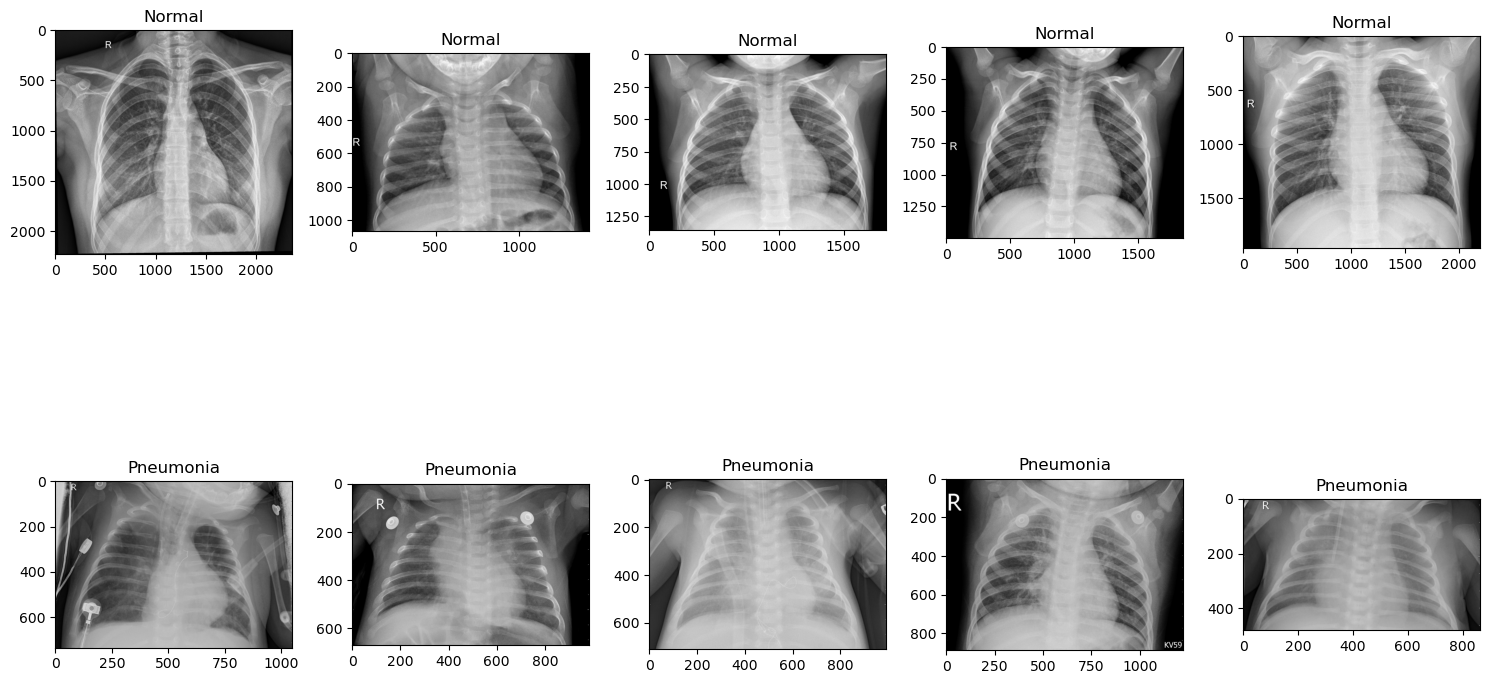

In [42]:
Normal_images=image_paths_normal[0:5]
Pneumonia_images=image_paths_pneumonia[0:5]
Images=Normal_images+Pneumonia_images
cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images[i])
    plt.subplot(rows,cols,i+1)
    plt.imshow(img)
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

You can see based on the axes that the sizes vary from image to image, which means that each of the images is not the same size and the images will have to be resized to make them equal.

We know that the training dataset is imbalanced and will require balancing. We know that the images will have to be resized to make them equal. However, we also have to ensure that the images are grey scaled if not they need to be grey scaled as part of the processing.

We will check whether images require grey scaling based on the dimension of the shape

In [43]:
def grey(x):
    img=cv2.imread(x)
    return len(img)==2

def count_rgb(image_paths):
    count=0
    for path in image_paths:
        if not grey(path):
            count+=1
    return count




In [38]:
count_normal_rgb=count_rgb(image_paths_normal)
print("Number of normal RGB images are {}".format(count_normal_rgb))

count_pneumonia_rgb=count_rgb(image_paths_pneumonia)
print("Number of pneumonia RGB images are {}".format(count_pneumonia_rgb))

Number of normal RGB images are 1341
Number of pneumonia RGB images are 3875


We can see that all of the images will reqire grey scaling

Now as part of our preprocessing, let us see how images will look like if we grey scale and resize them.
We will resize the images to 224x224 which is a standard that is used.

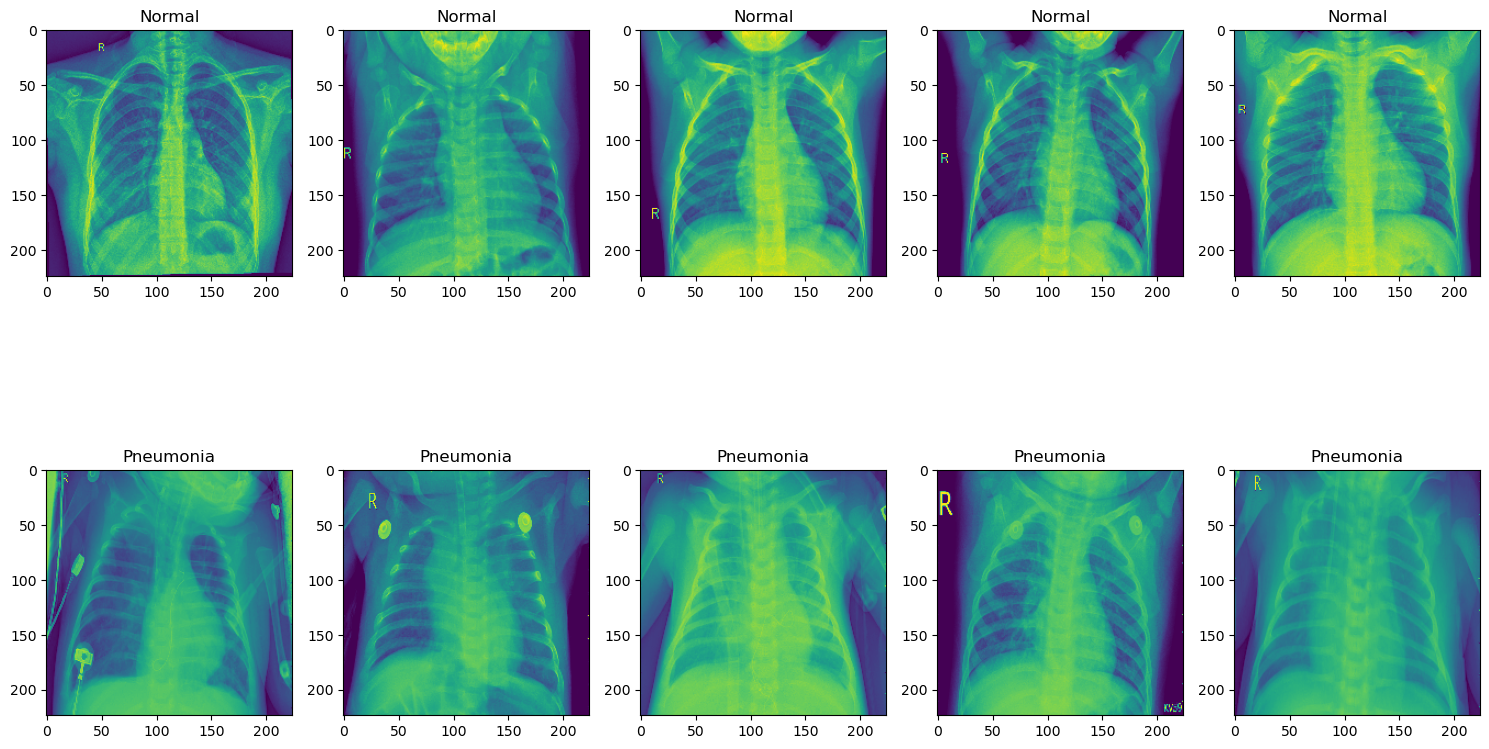

In [45]:
cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images[i])
    img_resize=cv2.resize(img,(224,224))
    img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
    plt.subplot(rows,cols,i+1)
    plt.imshow(img_gray)
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

Now we will process the training pneumonia and normal case images into numpy arrays after pre-processing all the images to make them suitable for classification

In [46]:

images_normal_training = []

for path in image_paths_normal:
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_normal_training.append(img_gray)
     else:
       print(f"Failed to load image: {path}")


In [47]:

images_pneumonia_training = []

for path in image_paths_pneumonia:
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_pneumonia_training.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

Save the pneumonia and normal training image numpy arrays

In [50]:
np.save('images_normal_training.npy', images_normal_training)
np.save('images_pneumonia_training.npy', images_pneumonia_training)

Now we will look at the test and validation datasets to process them 
First let us look at number of images in the test data set.

In [51]:
testing_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/test/NORMAL/'
testing_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/test/PNEUMONIA/'
image_paths_normal_test = glob.glob(testing_folder_normal + '*.jpeg')
image_paths_pneumonia_test = glob.glob(testing_folder_pneumonia + '*.jpeg')
print("Number of testing images which are normal", len(image_paths_normal_test))
print("Number of testing images which are pneumonia", len(image_paths_pneumonia_test))

Number of testing images which are normal 234
Number of testing images which are pneumonia 390


Let us preprocess the test dataset.

In [52]:

images_normal_testing = []

for path in image_paths_normal_test :
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_normal_testing.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

images_pneumonia_testing = []

for path in image_paths_pneumonia_test:
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_pneumonia_testing.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

Save the testing datasets as numpy arrays

In [53]:
np.save('images_normal_testing.npy', images_normal_testing)
np.save('images_pneumonia_testing.npy', images_pneumonia_testing)

There is a validation dataset that has been provided and we should look at 

In [55]:
validation_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/val/NORMAL/'
validation_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/val/PNEUMONIA/'
image_paths_normal_validation = glob.glob(validation_folder_normal + '*.jpeg')
image_paths_pneumonia_validation = glob.glob(validation_folder_pneumonia + '*.jpeg')
print("Number of validation images which are normal", len(image_paths_normal_validation))
print("Number of validation images which are pneumonia", len(image_paths_pneumonia_validation))

Number of validation images which are normal 8
Number of validation images which are pneumonia 8


The number of validation images are just too low to be of any use.